# Análise do Data Warehouse

Análise dos dados disponibilizados no Data Warehouse



**Instalando o Cassandra no Jupyter**

`docker-compose exec jupyter pip install cassandra-driver`

## Imports

In [1]:
#Imports
from time import sleep

In [2]:
#Imports Cassandra
from cassandra.auth import PlainTextAuthProvider
from cassandra.cluster import Cluster

In [3]:
#Imports Pandas
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
def pandas_factory(colnames, rows):
    return pd.DataFrame(rows, columns=colnames)

## Conexão ao banco de Dados Cassandra

In [4]:
#Conectando a seção
ap = PlainTextAuthProvider(username='cassandra', password='cassandra')
cluster = Cluster(['cassandra'], protocol_version=4, auth_provider=ap)
session = cluster.connect('alunos')
session.default_timeout = 60
session.row_factory = pandas_factory
sleep(2)

## Consulta

### Configurando a consulta
Atribuindo valores para as consultas

In [5]:
figsize=(10, 5)
fontsize=16
field_label="Faixa Etária"
table = 'fato_aluno_etaria'
field = 'faixa_etaria'
curse_types = []
filters = {    
    'categoria_situacao': ['Evadidos','Concluintes', 'Em curso'],
    field: True,
    'tipo_curso': len(curse_types) > 0,
    'instituicao': '',
    'unidade_ensino': '',
    'nome_curso': '',
    
}

### Construindo a string para a consulta
Criando fields e grupos para a consulta

In [6]:
s = []
gf = []
for k, v in filters.items():
    if v :
        if type(v) is str:
            s.append("({} = '{}')".format(k,v))            
        elif type(v) is list:
            s.append("({} IN ({}))".format(
                k,','.join(map(str,["'{}'".format(i) for i in v]))))
        if (type(v) is bool and v) or (not type(v) is bool):
            gf.append(k)
filter_sql = " AND ".join(map(str,s))
fields = ", ".join(map(str,gf))


### Execultado a consulta

In [7]:
#Execultado Consulta
sql = "SELECT {0}, sum(quant_grupo) AS quant_grupo" \
" FROM {1} " \
" WHERE {2} " \
" GROUP BY {0}" \
" ALLOW FILTERING;".format(
    fields,
    table,
    filter_sql)
rslt = session.execute(sql, timeout=None)
original_df = rslt._current_rows
original_df


,categoria_situacao,faixa_etaria,quant_grupo
0,Concluintes,15 a 19 anos,116364
1,Concluintes,20 a 24 anos,84362
2,Concluintes,25 a 29 anos,52538
3,Concluintes,30 a 34 anos,38693
4,Concluintes,35 a 39 anos,30015
5,Concluintes,40 a 44 anos,20519
6,Concluintes,45 a 49 anos,13723
7,Concluintes,50 a 54 anos,9392
8,Concluintes,55 a 59 anos,5459
9,Concluintes,Maior de 60 anos,5222


## Análise

In [8]:
s = original_df.shape
print("Número de registros {:,} e número de colunas {:,}.".format(s[0], s[1]).replace(',','.'))

Número de registros 33 e número de colunas 3.


## Filtrando Tipo do Curso

In [9]:
if curse_types :
    original_df = original_df[original_df['tipo_curso'].isin(curse_types)]
    print('Fitrando pelos tipos de cursos:\n {}'.format(', '.join(map(str,curse_types))))
    
else:
    print('Todos os cursos')
original_df

Todos os cursos


,categoria_situacao,faixa_etaria,quant_grupo
0,Concluintes,15 a 19 anos,116364
1,Concluintes,20 a 24 anos,84362
2,Concluintes,25 a 29 anos,52538
3,Concluintes,30 a 34 anos,38693
4,Concluintes,35 a 39 anos,30015
5,Concluintes,40 a 44 anos,20519
6,Concluintes,45 a 49 anos,13723
7,Concluintes,50 a 54 anos,9392
8,Concluintes,55 a 59 anos,5459
9,Concluintes,Maior de 60 anos,5222


## Agrupando

### Agrupando os valores para apresentar no gráfico

In [10]:
df = original_df.groupby(['categoria_situacao',field]).sum('quant_grupo').reset_index()
df_qtd = original_df.groupby([field]).sum('quant_grupo').reset_index()
order = list(df_qtd.sort_values('quant_grupo', ascending=False)[field])

### Ordenação personalizada

In [11]:
order = [
    'Menor de 14 anos',
    '15 a 19 anos',
    '20 a 24 anos',
    '25 a 29 anos',
    '30 a 34 anos',
    '35 a 39 anos',
    '40 a 44 anos',
    '45 a 49 anos',
    '50 a 54 anos',
    '55 a 59 anos',
    'Maior de 60 anos',
]

### Ordenando dados

In [12]:
sort_keys = {v:k for k,v in enumerate(order)}
func_sort = lambda e: sort_keys[e]
df_cat = df.pivot_table('quant_grupo',[field],'categoria_situacao').sort_values(by=field, key=lambda col: col.map(func_sort))
df_qtd = df_qtd.pivot_table('quant_grupo',[field]).sort_values(by=field, key=lambda col: col.map(func_sort))

### Apresentando o gráfico

Text(0.5, 1.0, 'QUANTIDADE POR FAIXA ETÁRIA')

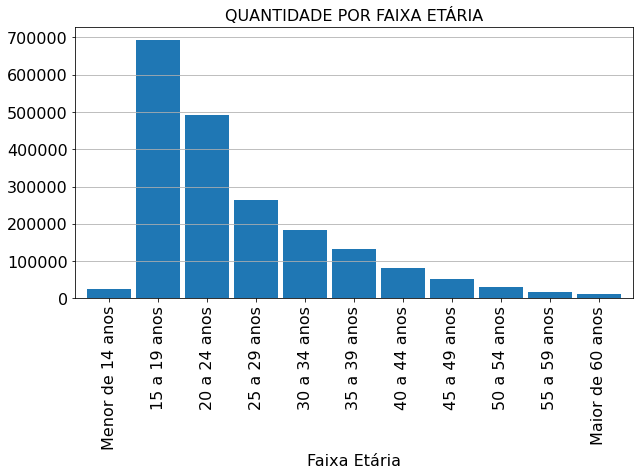

In [13]:
chart1 = df_qtd.plot(kind ='bar', figsize=figsize, width = 0.9, grid= True, legend =False, fontsize=fontsize)
chart1.grid(axis='x')
chart1.set_xlabel(field_label,fontdict={'fontsize':fontsize})
chart1.set_title("QUANTIDADE POR {}".format(field_label.upper()),fontdict={'fontsize':fontsize})

Text(0.5, 1.0, 'QUANTIDADE POR CATEGORIA DE SITUAÇÃO EM FAIXA ETÁRIA')

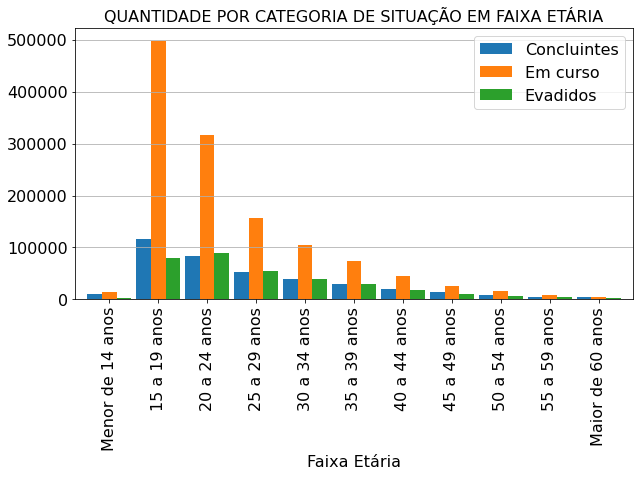

In [19]:
chart2 = df_cat.plot(kind ='bar', figsize=figsize, width = 0.9, grid= True, fontsize=fontsize)
chart2.grid(axis='x')
chart2.get_legend().set_title('Categoria/Situação')
chart2.legend(fontsize=16)
chart2.set_xlabel(field_label,fontdict={'fontsize':16})
chart2.set_title("QUANTIDADE POR CATEGORIA DE SITUAÇÃO EM {}".format(field_label.upper()),fontdict={'fontsize':fontsize})

## Total de Alunos

In [15]:
categories = list(df['categoria_situacao'].unique())
total = df['quant_grupo'].sum()
df_res = df_cat.copy() 
df_res['total'] = df_res[categories].sum(axis=1)
for category in categories:
    df_res[category + '_%'] = df_res[category] / df_res['total']
df_res['total_%'] = df_res['total'] / total
df_res

categoria_situacao,Concluintes,Em curso,Evadidos,total,Concluintes_%,Em curso_%,Evadidos_%,total_%
faixa_etaria,,,,,,,,
Menor de 14 anos,9996,14450,1999,26445,0.377992,0.546417,0.075591,0.013303
15 a 19 anos,116364,498301,79628,694293,0.167601,0.717710,0.114689,0.349260
20 a 24 anos,84362,317063,89506,490931,0.171841,0.645840,0.182319,0.246960
25 a 29 anos,52538,156993,54953,264484,0.198643,0.593582,0.207774,0.133047
30 a 34 anos,38693,104159,39860,182712,0.211770,0.570072,0.218158,0.091912
35 a 39 anos,30015,73988,29433,133436,0.224939,0.554483,0.220578,0.067124
40 a 44 anos,20519,44172,18207,82898,0.247521,0.532848,0.219631,0.041701
45 a 49 anos,13723,26020,11266,51009,0.269031,0.510106,0.220863,0.025660
50 a 54 anos,9392,15553,7028,31973,0.293748,0.486442,0.219810,0.016084


In [16]:
print("Total de alunos: {:,}".format(df['quant_grupo'].sum()).replace(',','.'))

Total de alunos: 1.987.896


# Porcentagem de Conclusão

<AxesSubplot:xlabel='faixa_etaria'>

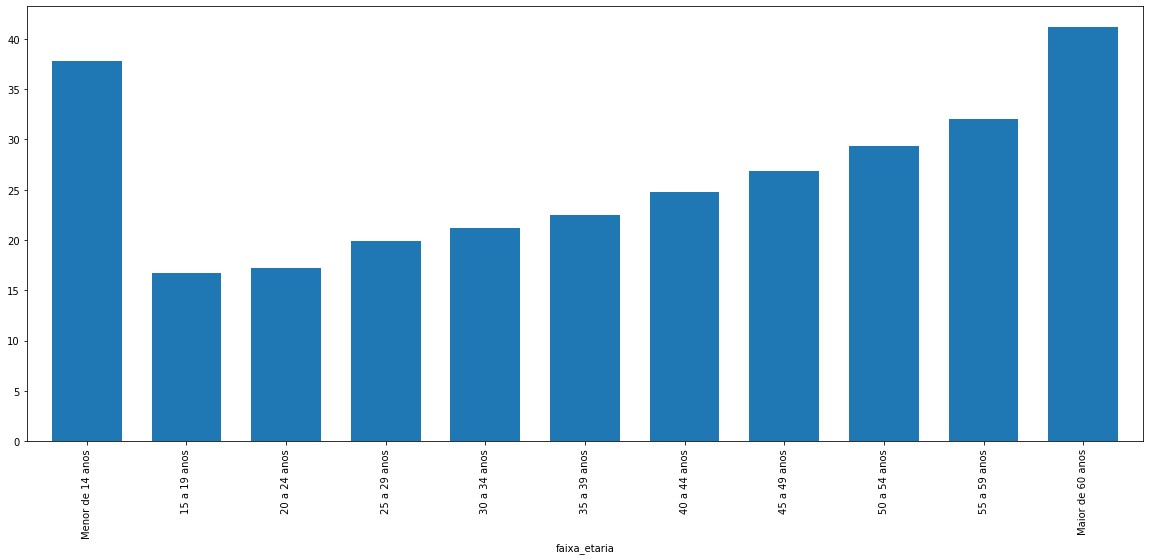

In [17]:
df_drp = df_res['Concluintes_%'] * 100

df_drp.plot(kind ='bar', figsize=(20, 8), width = 0.7)